In [1]:
##################################################
### simple keras single layer neural nets with keras in Boston Housing

##################################################
### imports
import numpy as np
import pandas as pd
import math
import scipy as sp

#graphics with matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#ipython terminal
%matplotlib
#jupyter notebook
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Using matplotlib backend: MacOSX


In [2]:
### data
from sklearn.datasets import load_boston

boston = load_boston()
features = boston.data
y = boston.target

In [3]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
features.shape

(506, 13)

In [6]:
y.shape

(506,)

In [7]:
### train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(features,y, random_state=99,test_size=.25)

means should be 0, sds should be 1
[-3.21203047e-16 -1.58477746e-16  3.23400058e-15 -1.87478294e-16
 -5.46323467e-15  4.08937030e-16  6.46507181e-16  7.23841977e-16
 -3.51521802e-18  9.00774618e-18  2.38700880e-14  7.45987851e-15
 -9.02825161e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0, 0.5, 'medv')

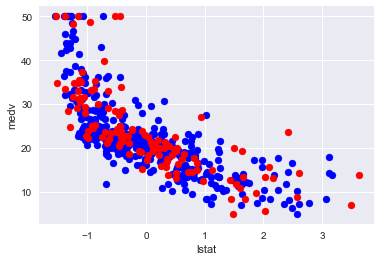

In [8]:
## scale
scl = StandardScaler()
Xtr = scl.fit_transform(Xtrain)
Xte = scl.transform(Xtest)
print("means should be 0, sds should be 1")
print(Xtr.mean(axis=0))
print(Xtr.std(axis=0))

## pull off lstat
Xtr1 = Xtr[:,12][:,np.newaxis] # or np.expand_dims(Xtr[:,12], axis = 1)
Xte1 = Xte[:,12][:,np.newaxis]

## our familiar plot
plt.scatter(Xtr1,ytrain,c='blue')
plt.xlabel("lstat"); plt.ylabel("medv")

plt.scatter(Xte1,ytest,c='red')
plt.xlabel("lstat"); plt.ylabel("medv")


Epoch 1/1000
19/19 [==============================] - 1s 9ms/step - loss: 627.3747 - mse: 627.3726 - val_loss: 691.1241 - val_mse: 691.1218
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 623.0484 - mse: 623.0461 - val_loss: 687.0665 - val_mse: 687.0641
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 619.2712 - mse: 619.2688 - val_loss: 683.1479 - val_mse: 683.1454
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 615.5353 - mse: 615.5327 - val_loss: 679.2402 - val_mse: 679.2376
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 611.8566 - mse: 611.8540 - val_loss: 675.4310 - val_mse: 675.4284
Epoch 6/1000
19/19 [==============================] - 0s 2ms/step - loss: 608.2706 - mse: 608.2679 - val_loss: 671.6902 - val_mse: 671.6875
Epoch 7/1000
19/19 [==============================] - 0s 2ms/step - loss: 604.7113 - mse: 604.7086 - val_loss: 667.9612 - val_mse: 667.9584
Epoch 8/1000
19/19 [

19/19 [==============================] - 0s 2ms/step - loss: 452.5167 - mse: 452.5120 - val_loss: 507.8793 - val_mse: 507.8748
Epoch 60/1000
19/19 [==============================] - 0s 2ms/step - loss: 449.6675 - mse: 449.6630 - val_loss: 504.8628 - val_mse: 504.8583
Epoch 61/1000
19/19 [==============================] - 0s 2ms/step - loss: 446.8282 - mse: 446.8237 - val_loss: 501.8319 - val_mse: 501.8275
Epoch 62/1000
19/19 [==============================] - 0s 2ms/step - loss: 443.9197 - mse: 443.9154 - val_loss: 498.7350 - val_mse: 498.7306
Epoch 63/1000
19/19 [==============================] - 0s 2ms/step - loss: 441.0387 - mse: 441.0344 - val_loss: 495.6907 - val_mse: 495.6864
Epoch 64/1000
19/19 [==============================] - 0s 2ms/step - loss: 438.1246 - mse: 438.1203 - val_loss: 492.5789 - val_mse: 492.5747
Epoch 65/1000
19/19 [==============================] - 0s 2ms/step - loss: 435.1747 - mse: 435.1704 - val_loss: 489.4265 - val_mse: 489.4224
Epoch 66/1000
19/19 [======

19/19 [==============================] - 0s 2ms/step - loss: 267.0031 - mse: 267.0016 - val_loss: 308.8986 - val_mse: 308.8971
Epoch 118/1000
19/19 [==============================] - 0s 2ms/step - loss: 263.7294 - mse: 263.7279 - val_loss: 305.3519 - val_mse: 305.3504
Epoch 119/1000
19/19 [==============================] - 0s 2ms/step - loss: 260.4629 - mse: 260.4614 - val_loss: 301.7924 - val_mse: 301.7909
Epoch 120/1000
19/19 [==============================] - 0s 2ms/step - loss: 257.2438 - mse: 257.2423 - val_loss: 298.3298 - val_mse: 298.3283
Epoch 121/1000
19/19 [==============================] - 0s 2ms/step - loss: 254.0517 - mse: 254.0502 - val_loss: 294.8439 - val_mse: 294.8424
Epoch 122/1000
19/19 [==============================] - 0s 2ms/step - loss: 250.8473 - mse: 250.8458 - val_loss: 291.3410 - val_mse: 291.3395
Epoch 123/1000
19/19 [==============================] - 0s 2ms/step - loss: 247.6487 - mse: 247.6471 - val_loss: 287.8892 - val_mse: 287.8877
Epoch 124/1000
19/19 

Epoch 175/1000
19/19 [==============================] - 0s 2ms/step - loss: 116.6791 - mse: 116.6746 - val_loss: 142.2292 - val_mse: 142.2246
Epoch 176/1000
19/19 [==============================] - 0s 2ms/step - loss: 114.9631 - mse: 114.9585 - val_loss: 140.2710 - val_mse: 140.2663
Epoch 177/1000
19/19 [==============================] - 0s 2ms/step - loss: 113.2508 - mse: 113.2461 - val_loss: 138.2283 - val_mse: 138.2235
Epoch 178/1000
19/19 [==============================] - 0s 2ms/step - loss: 111.5585 - mse: 111.5536 - val_loss: 136.2775 - val_mse: 136.2725
Epoch 179/1000
19/19 [==============================] - 0s 2ms/step - loss: 109.8905 - mse: 109.8856 - val_loss: 134.3253 - val_mse: 134.3203
Epoch 180/1000
19/19 [==============================] - 0s 2ms/step - loss: 108.2683 - mse: 108.2632 - val_loss: 132.4504 - val_mse: 132.4453
Epoch 181/1000
19/19 [==============================] - 0s 2ms/step - loss: 106.6716 - mse: 106.6664 - val_loss: 130.5532 - val_mse: 130.5479
Epoch 

Epoch 234/1000
19/19 [==============================] - 0s 2ms/step - loss: 59.3265 - mse: 59.3127 - val_loss: 71.0671 - val_mse: 71.0532
Epoch 235/1000
19/19 [==============================] - 0s 2ms/step - loss: 58.9041 - mse: 58.8902 - val_loss: 70.4682 - val_mse: 70.4542
Epoch 236/1000
19/19 [==============================] - 0s 2ms/step - loss: 58.5046 - mse: 58.4905 - val_loss: 69.9329 - val_mse: 69.9186
Epoch 237/1000
19/19 [==============================] - 0s 2ms/step - loss: 58.0986 - mse: 58.0843 - val_loss: 69.3216 - val_mse: 69.3071
Epoch 238/1000
19/19 [==============================] - 0s 2ms/step - loss: 57.6822 - mse: 57.6677 - val_loss: 68.7700 - val_mse: 68.7553
Epoch 239/1000
19/19 [==============================] - 0s 2ms/step - loss: 57.2890 - mse: 57.2743 - val_loss: 68.1983 - val_mse: 68.1834
Epoch 240/1000
19/19 [==============================] - 0s 2ms/step - loss: 56.9185 - mse: 56.9035 - val_loss: 67.6885 - val_mse: 67.6735
Epoch 241/1000
19/19 [============

19/19 [==============================] - 0s 2ms/step - loss: 45.8036 - mse: 45.7794 - val_loss: 51.0673 - val_mse: 51.0429
Epoch 294/1000
19/19 [==============================] - 0s 2ms/step - loss: 45.6915 - mse: 45.6671 - val_loss: 50.9075 - val_mse: 50.8830
Epoch 295/1000
19/19 [==============================] - 0s 2ms/step - loss: 45.5842 - mse: 45.5596 - val_loss: 50.7299 - val_mse: 50.7052
Epoch 296/1000
19/19 [==============================] - 0s 2ms/step - loss: 45.4657 - mse: 45.4411 - val_loss: 50.5560 - val_mse: 50.5312
Epoch 297/1000
19/19 [==============================] - 0s 2ms/step - loss: 45.3467 - mse: 45.3219 - val_loss: 50.3554 - val_mse: 50.3306
Epoch 298/1000
19/19 [==============================] - 0s 2ms/step - loss: 45.2308 - mse: 45.2059 - val_loss: 50.1685 - val_mse: 50.1436
Epoch 299/1000
19/19 [==============================] - 0s 2ms/step - loss: 45.1281 - mse: 45.1031 - val_loss: 50.0101 - val_mse: 49.9851
Epoch 300/1000
19/19 [===========================

19/19 [==============================] - 0s 3ms/step - loss: 40.6924 - mse: 40.6685 - val_loss: 44.2001 - val_mse: 44.1764
Epoch 353/1000
19/19 [==============================] - 0s 3ms/step - loss: 40.6213 - mse: 40.5975 - val_loss: 44.1105 - val_mse: 44.0868
Epoch 354/1000
19/19 [==============================] - 0s 2ms/step - loss: 40.5420 - mse: 40.5183 - val_loss: 44.0130 - val_mse: 43.9894
Epoch 355/1000
19/19 [==============================] - 0s 3ms/step - loss: 40.4615 - mse: 40.4379 - val_loss: 43.9274 - val_mse: 43.9038
Epoch 356/1000
19/19 [==============================] - 0s 3ms/step - loss: 40.3838 - mse: 40.3602 - val_loss: 43.8427 - val_mse: 43.8192
Epoch 357/1000
19/19 [==============================] - 0s 3ms/step - loss: 40.3059 - mse: 40.2825 - val_loss: 43.7572 - val_mse: 43.7337
Epoch 358/1000
19/19 [==============================] - 0s 3ms/step - loss: 40.2305 - mse: 40.2072 - val_loss: 43.6864 - val_mse: 43.6631
Epoch 359/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 36.9867 - mse: 36.9661 - val_loss: 40.6901 - val_mse: 40.6695
Epoch 412/1000
19/19 [==============================] - 0s 2ms/step - loss: 36.9311 - mse: 36.9105 - val_loss: 40.6575 - val_mse: 40.6368
Epoch 413/1000
19/19 [==============================] - 0s 2ms/step - loss: 36.8851 - mse: 36.8645 - val_loss: 40.5928 - val_mse: 40.5722
Epoch 414/1000
19/19 [==============================] - 0s 2ms/step - loss: 36.8357 - mse: 36.8151 - val_loss: 40.5428 - val_mse: 40.5222
Epoch 415/1000
19/19 [==============================] - 0s 2ms/step - loss: 36.7841 - mse: 36.7636 - val_loss: 40.4928 - val_mse: 40.4723
Epoch 416/1000
19/19 [==============================] - 0s 2ms/step - loss: 36.7231 - mse: 36.7026 - val_loss: 40.4331 - val_mse: 40.4126
Epoch 417/1000
19/19 [==============================] - 0s 2ms/step - loss: 36.6686 - mse: 36.6482 - val_loss: 40.3902 - val_mse: 40.3697
Epoch 418/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 34.4395 - mse: 34.4196 - val_loss: 38.6691 - val_mse: 38.6491
Epoch 471/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.4059 - mse: 34.3860 - val_loss: 38.6382 - val_mse: 38.6182
Epoch 472/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.3631 - mse: 34.3431 - val_loss: 38.6172 - val_mse: 38.5973
Epoch 473/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.3201 - mse: 34.3002 - val_loss: 38.5727 - val_mse: 38.5528
Epoch 474/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.2827 - mse: 34.2628 - val_loss: 38.5454 - val_mse: 38.5255
Epoch 475/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.2440 - mse: 34.2241 - val_loss: 38.5223 - val_mse: 38.5024
Epoch 476/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.2117 - mse: 34.1918 - val_loss: 38.5060 - val_mse: 38.4861
Epoch 477/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 32.6948 - mse: 32.6746 - val_loss: 37.5454 - val_mse: 37.5252
Epoch 530/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.6728 - mse: 32.6527 - val_loss: 37.5255 - val_mse: 37.5053
Epoch 531/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.6470 - mse: 32.6268 - val_loss: 37.5142 - val_mse: 37.4940
Epoch 532/1000
19/19 [==============================] - 0s 3ms/step - loss: 32.6212 - mse: 32.6010 - val_loss: 37.4889 - val_mse: 37.4687
Epoch 533/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.5944 - mse: 32.5742 - val_loss: 37.4817 - val_mse: 37.4615
Epoch 534/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.5669 - mse: 32.5467 - val_loss: 37.4604 - val_mse: 37.4402
Epoch 535/1000
19/19 [==============================] - 0s 3ms/step - loss: 32.5472 - mse: 32.5269 - val_loss: 37.4477 - val_mse: 37.4274
Epoch 536/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 31.3998 - mse: 31.3789 - val_loss: 36.8008 - val_mse: 36.7799
Epoch 589/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.3803 - mse: 31.3594 - val_loss: 36.7775 - val_mse: 36.7566
Epoch 590/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.3664 - mse: 31.3455 - val_loss: 36.7923 - val_mse: 36.7714
Epoch 591/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.3406 - mse: 31.3198 - val_loss: 36.7866 - val_mse: 36.7657
Epoch 592/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.3238 - mse: 31.3029 - val_loss: 36.7926 - val_mse: 36.7717
Epoch 593/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.3016 - mse: 31.2807 - val_loss: 36.7591 - val_mse: 36.7381
Epoch 594/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.2834 - mse: 31.2625 - val_loss: 36.7622 - val_mse: 36.7413
Epoch 595/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 30.3713 - mse: 30.3496 - val_loss: 36.4705 - val_mse: 36.4488
Epoch 648/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.3539 - mse: 30.3322 - val_loss: 36.4630 - val_mse: 36.4413
Epoch 649/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.3392 - mse: 30.3175 - val_loss: 36.4667 - val_mse: 36.4450
Epoch 650/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.3251 - mse: 30.3034 - val_loss: 36.4702 - val_mse: 36.4485
Epoch 651/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.3097 - mse: 30.2880 - val_loss: 36.4735 - val_mse: 36.4517
Epoch 652/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.2944 - mse: 30.2727 - val_loss: 36.4525 - val_mse: 36.4307
Epoch 653/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.2873 - mse: 30.2655 - val_loss: 36.4320 - val_mse: 36.4102
Epoch 654/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 29.5631 - mse: 29.5405 - val_loss: 36.2373 - val_mse: 36.2147
Epoch 707/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.5500 - mse: 29.5274 - val_loss: 36.2333 - val_mse: 36.2107
Epoch 708/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.5361 - mse: 29.5134 - val_loss: 36.2166 - val_mse: 36.1939
Epoch 709/1000
19/19 [==============================] - 0s 3ms/step - loss: 29.5179 - mse: 29.4952 - val_loss: 36.1929 - val_mse: 36.1702
Epoch 710/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.5117 - mse: 29.4890 - val_loss: 36.2039 - val_mse: 36.1812
Epoch 711/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.4938 - mse: 29.4711 - val_loss: 36.1912 - val_mse: 36.1684
Epoch 712/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.4817 - mse: 29.4590 - val_loss: 36.1777 - val_mse: 36.1549
Epoch 713/1000
19/19 [===========================

19/19 [==============================] - 0s 3ms/step - loss: 28.8774 - mse: 28.8538 - val_loss: 36.0939 - val_mse: 36.0702
Epoch 766/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8681 - mse: 28.8444 - val_loss: 36.0917 - val_mse: 36.0680
Epoch 767/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8552 - mse: 28.8315 - val_loss: 36.0891 - val_mse: 36.0654
Epoch 768/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8480 - mse: 28.8243 - val_loss: 36.0728 - val_mse: 36.0491
Epoch 769/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8371 - mse: 28.8134 - val_loss: 36.0643 - val_mse: 36.0406
Epoch 770/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8256 - mse: 28.8019 - val_loss: 36.0545 - val_mse: 36.0308
Epoch 771/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8169 - mse: 28.7932 - val_loss: 36.0708 - val_mse: 36.0470
Epoch 772/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 28.3059 - mse: 28.2813 - val_loss: 36.0443 - val_mse: 36.0196
Epoch 825/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2970 - mse: 28.2723 - val_loss: 36.0329 - val_mse: 36.0082
Epoch 826/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2862 - mse: 28.2615 - val_loss: 36.0310 - val_mse: 36.0063
Epoch 827/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2702 - mse: 28.2455 - val_loss: 36.0254 - val_mse: 36.0007
Epoch 828/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2624 - mse: 28.2376 - val_loss: 36.0217 - val_mse: 35.9970
Epoch 829/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2572 - mse: 28.2325 - val_loss: 36.0233 - val_mse: 35.9985
Epoch 830/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2437 - mse: 28.2189 - val_loss: 36.0161 - val_mse: 35.9913
Epoch 831/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 27.7998 - mse: 27.7741 - val_loss: 36.0278 - val_mse: 36.0021
Epoch 884/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.7925 - mse: 27.7667 - val_loss: 36.0364 - val_mse: 36.0107
Epoch 885/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.7745 - mse: 27.7488 - val_loss: 36.0556 - val_mse: 36.0299
Epoch 886/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.7725 - mse: 27.7467 - val_loss: 36.0508 - val_mse: 36.0251
Epoch 887/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.7628 - mse: 27.7371 - val_loss: 36.0456 - val_mse: 36.0199
Epoch 888/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.7552 - mse: 27.7293 - val_loss: 36.0579 - val_mse: 36.0321
Epoch 889/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.7512 - mse: 27.7254 - val_loss: 36.0482 - val_mse: 36.0223
Epoch 890/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 27.3485 - mse: 27.3216 - val_loss: 36.0421 - val_mse: 36.0152
Epoch 943/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.3339 - mse: 27.3069 - val_loss: 36.0404 - val_mse: 36.0135
Epoch 944/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.3326 - mse: 27.3058 - val_loss: 36.0388 - val_mse: 36.0119
Epoch 945/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.3265 - mse: 27.2995 - val_loss: 36.0362 - val_mse: 36.0092
Epoch 946/1000
19/19 [==============================] - 0s 3ms/step - loss: 27.3104 - mse: 27.2835 - val_loss: 36.0312 - val_mse: 36.0042
Epoch 947/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.3126 - mse: 27.2856 - val_loss: 36.0371 - val_mse: 36.0101
Epoch 948/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.3066 - mse: 27.2797 - val_loss: 36.0434 - val_mse: 36.0163
Epoch 949/1000
19/19 [===========================

Text(0, 0.5, 'loss')

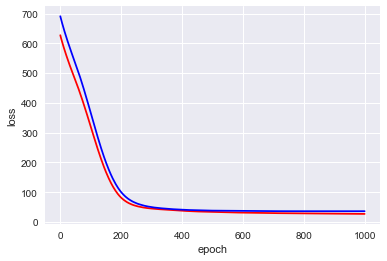

In [9]:
### fit neural net with small number of units and not much L2 regularization

#make model
lp2pen = .001
nx = Xtr1.shape[1]
nn1 = models.Sequential()
nn1.add(layers.Dense(units=5,activation='sigmoid',kernel_regularizer = regularizers.l2(lp2pen),input_shape=(nx,)))
nn1.add(layers.Dense(units=1))

#compile model
nn1.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

# fit
nhist = nn1.fit(Xtr1,ytrain,epochs=1000,verbose=1,batch_size=20,validation_data=(Xte1,ytest))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')

### plot fit -in sample
#yhtr = nn1.predict(Xtr1)
#plt.scatter(Xtr1,ytrain,c='red')
#plt.scatter(Xtr1,yhtr,c='blue')
#plt.xlabel('x=lstat'); plt.ylabel('y=medv')

### plot fit -out sample
#yhte = nn1.predict(Xte1)
#plt.scatter(Xte1,ytest,c='red')
#plt.scatter(Xte1,yhte,c='blue')
#plt.xlabel('x=lstat'); plt.ylabel('y=medv')

In [10]:
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


12/12 [==============================] - 0s 804us/step


Text(0, 0.5, 'y=medv')

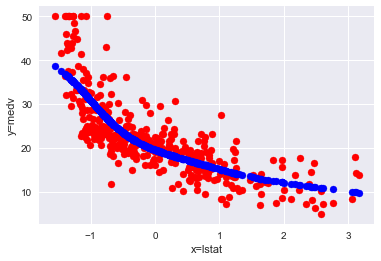

In [11]:
### plot fit -in sample
yhtr = nn1.predict(Xtr1)
plt.scatter(Xtr1,ytrain,c='red')
plt.scatter(Xtr1,yhtr,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')


4/4 [==============================] - 0s 1ms/step


Text(0, 0.5, 'y=medv')

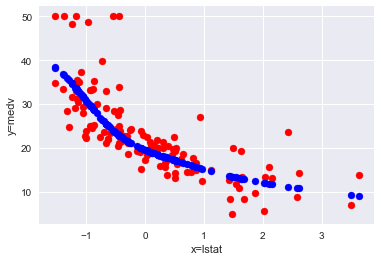

In [12]:
### plot fit -out sample
yhte = nn1.predict(Xte1)
plt.scatter(Xte1,ytest,c='red')
plt.scatter(Xte1,yhte,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')

Epoch 1/1000
19/19 [==============================] - 0s 7ms/step - loss: 540.8842 - mse: 540.8651 - val_loss: 587.1079 - val_mse: 587.0883
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 514.6398 - mse: 514.6200 - val_loss: 562.4193 - val_mse: 562.3990
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 492.2480 - mse: 492.2272 - val_loss: 539.1941 - val_mse: 539.1727
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 470.5348 - mse: 470.5127 - val_loss: 516.5040 - val_mse: 516.4813
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 449.1142 - mse: 449.0906 - val_loss: 493.8806 - val_mse: 493.8563
Epoch 6/1000
19/19 [==============================] - 0s 2ms/step - loss: 428.0517 - mse: 428.0264 - val_loss: 471.6423 - val_mse: 471.6159
Epoch 7/1000
19/19 [==============================] - 0s 2ms/step - loss: 407.3042 - mse: 407.2768 - val_loss: 449.8457 - val_mse: 449.8172
Epoch 8/1000
19/19 [

19/19 [==============================] - 0s 2ms/step - loss: 38.3441 - mse: 38.0231 - val_loss: 43.1930 - val_mse: 42.8703
Epoch 61/1000
19/19 [==============================] - 0s 2ms/step - loss: 38.2831 - mse: 37.9597 - val_loss: 43.1098 - val_mse: 42.7843
Epoch 62/1000
19/19 [==============================] - 0s 2ms/step - loss: 38.2366 - mse: 37.9111 - val_loss: 43.0580 - val_mse: 42.7299
Epoch 63/1000
19/19 [==============================] - 0s 2ms/step - loss: 38.1491 - mse: 37.8197 - val_loss: 43.0998 - val_mse: 42.7695
Epoch 64/1000
19/19 [==============================] - 0s 2ms/step - loss: 38.1121 - mse: 37.7820 - val_loss: 43.0229 - val_mse: 42.6906
Epoch 65/1000
19/19 [==============================] - 0s 2ms/step - loss: 38.0583 - mse: 37.7263 - val_loss: 42.8907 - val_mse: 42.5564
Epoch 66/1000
19/19 [==============================] - 0s 2ms/step - loss: 37.9826 - mse: 37.6463 - val_loss: 42.8321 - val_mse: 42.4960
Epoch 67/1000
19/19 [==============================] - 

Epoch 120/1000
19/19 [==============================] - 0s 2ms/step - loss: 35.9957 - mse: 35.6569 - val_loss: 40.8537 - val_mse: 40.5162
Epoch 121/1000
19/19 [==============================] - 0s 2ms/step - loss: 35.9592 - mse: 35.6228 - val_loss: 40.7829 - val_mse: 40.4453
Epoch 122/1000
19/19 [==============================] - 0s 2ms/step - loss: 35.9155 - mse: 35.5784 - val_loss: 40.6668 - val_mse: 40.3291
Epoch 123/1000
19/19 [==============================] - 0s 2ms/step - loss: 35.9139 - mse: 35.5781 - val_loss: 40.7153 - val_mse: 40.3790
Epoch 124/1000
19/19 [==============================] - 0s 2ms/step - loss: 35.8814 - mse: 35.5451 - val_loss: 40.6467 - val_mse: 40.3102
Epoch 125/1000
19/19 [==============================] - 0s 2ms/step - loss: 35.8398 - mse: 35.5024 - val_loss: 40.6545 - val_mse: 40.3183
Epoch 126/1000
19/19 [==============================] - 0s 2ms/step - loss: 35.8114 - mse: 35.4741 - val_loss: 40.6661 - val_mse: 40.3295
Epoch 127/1000
19/19 [============

19/19 [==============================] - 0s 2ms/step - loss: 34.1838 - mse: 33.8338 - val_loss: 38.8308 - val_mse: 38.4805
Epoch 180/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.1661 - mse: 33.8163 - val_loss: 38.8134 - val_mse: 38.4624
Epoch 181/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.1435 - mse: 33.7923 - val_loss: 38.7663 - val_mse: 38.4149
Epoch 182/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.1201 - mse: 33.7678 - val_loss: 38.7784 - val_mse: 38.4270
Epoch 183/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.0625 - mse: 33.7101 - val_loss: 38.7619 - val_mse: 38.4099
Epoch 184/1000
19/19 [==============================] - 0s 2ms/step - loss: 34.0325 - mse: 33.6803 - val_loss: 38.7517 - val_mse: 38.3992
Epoch 185/1000
19/19 [==============================] - 0s 2ms/step - loss: 33.9908 - mse: 33.6367 - val_loss: 38.8932 - val_mse: 38.5407
Epoch 186/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 32.7315 - mse: 32.3515 - val_loss: 37.3662 - val_mse: 36.9839
Epoch 239/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.7302 - mse: 32.3483 - val_loss: 37.4205 - val_mse: 37.0377
Epoch 240/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.7140 - mse: 32.3320 - val_loss: 37.4156 - val_mse: 37.0318
Epoch 241/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.6570 - mse: 32.2743 - val_loss: 37.2792 - val_mse: 36.8943
Epoch 242/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.6696 - mse: 32.2841 - val_loss: 37.3251 - val_mse: 36.9399
Epoch 243/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.6510 - mse: 32.2656 - val_loss: 37.3608 - val_mse: 36.9753
Epoch 244/1000
19/19 [==============================] - 0s 2ms/step - loss: 32.6173 - mse: 32.2325 - val_loss: 37.3023 - val_mse: 36.9161
Epoch 245/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 31.6512 - mse: 31.2402 - val_loss: 36.6228 - val_mse: 36.2107
Epoch 298/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.6295 - mse: 31.2166 - val_loss: 36.6543 - val_mse: 36.2419
Epoch 299/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.6112 - mse: 31.1988 - val_loss: 36.6195 - val_mse: 36.2061
Epoch 300/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.5864 - mse: 31.1731 - val_loss: 36.5811 - val_mse: 36.1668
Epoch 301/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.5694 - mse: 31.1548 - val_loss: 36.5336 - val_mse: 36.1185
Epoch 302/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.5673 - mse: 31.1519 - val_loss: 36.5844 - val_mse: 36.1695
Epoch 303/1000
19/19 [==============================] - 0s 2ms/step - loss: 31.5303 - mse: 31.1151 - val_loss: 36.6351 - val_mse: 36.2196
Epoch 304/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 30.8215 - mse: 30.3806 - val_loss: 36.2187 - val_mse: 35.7788
Epoch 357/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.7489 - mse: 30.3086 - val_loss: 36.1955 - val_mse: 35.7553
Epoch 358/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.7697 - mse: 30.3291 - val_loss: 36.1930 - val_mse: 35.7523
Epoch 359/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.7693 - mse: 30.3288 - val_loss: 36.1714 - val_mse: 35.7303
Epoch 360/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.7550 - mse: 30.3143 - val_loss: 36.1432 - val_mse: 35.7017
Epoch 361/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.7147 - mse: 30.2727 - val_loss: 36.1258 - val_mse: 35.6840
Epoch 362/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.7113 - mse: 30.2684 - val_loss: 36.1363 - val_mse: 35.6938
Epoch 363/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 30.1413 - mse: 29.6810 - val_loss: 35.9378 - val_mse: 35.4771
Epoch 416/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.1112 - mse: 29.6502 - val_loss: 35.8841 - val_mse: 35.4229
Epoch 417/1000
19/19 [==============================] - 0s 3ms/step - loss: 30.1182 - mse: 29.6580 - val_loss: 35.9215 - val_mse: 35.4606
Epoch 418/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.1103 - mse: 29.6487 - val_loss: 35.9459 - val_mse: 35.4850
Epoch 419/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.0916 - mse: 29.6310 - val_loss: 35.8754 - val_mse: 35.4135
Epoch 420/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.1099 - mse: 29.6485 - val_loss: 35.9043 - val_mse: 35.4425
Epoch 421/1000
19/19 [==============================] - 0s 2ms/step - loss: 30.0739 - mse: 29.6111 - val_loss: 35.9169 - val_mse: 35.4549
Epoch 422/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 29.6166 - mse: 29.1401 - val_loss: 35.6602 - val_mse: 35.1817
Epoch 475/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.6309 - mse: 29.1528 - val_loss: 35.6650 - val_mse: 35.1863
Epoch 476/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.6261 - mse: 29.1487 - val_loss: 35.6879 - val_mse: 35.2096
Epoch 477/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.5816 - mse: 29.1026 - val_loss: 35.7863 - val_mse: 35.3084
Epoch 478/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.5948 - mse: 29.1165 - val_loss: 35.8008 - val_mse: 35.3225
Epoch 479/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.5710 - mse: 29.0927 - val_loss: 35.7585 - val_mse: 35.2798
Epoch 480/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.5911 - mse: 29.1117 - val_loss: 35.8328 - val_mse: 35.3542
Epoch 481/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 29.2266 - mse: 28.7353 - val_loss: 35.7092 - val_mse: 35.2185
Epoch 534/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.1721 - mse: 28.6827 - val_loss: 35.6164 - val_mse: 35.1245
Epoch 535/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.1698 - mse: 28.6777 - val_loss: 35.7040 - val_mse: 35.2125
Epoch 536/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.1954 - mse: 28.7028 - val_loss: 35.7547 - val_mse: 35.2629
Epoch 537/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.1942 - mse: 28.7035 - val_loss: 35.7380 - val_mse: 35.2461
Epoch 538/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.1613 - mse: 28.6682 - val_loss: 35.7436 - val_mse: 35.2514
Epoch 539/1000
19/19 [==============================] - 0s 2ms/step - loss: 29.1633 - mse: 28.6705 - val_loss: 35.7778 - val_mse: 35.2857
Epoch 540/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 28.8651 - mse: 28.3637 - val_loss: 35.6772 - val_mse: 35.1759
Epoch 593/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8697 - mse: 28.3688 - val_loss: 35.6777 - val_mse: 35.1761
Epoch 594/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8283 - mse: 28.3252 - val_loss: 35.7720 - val_mse: 35.2712
Epoch 595/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8504 - mse: 28.3493 - val_loss: 35.7648 - val_mse: 35.2639
Epoch 596/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8245 - mse: 28.3225 - val_loss: 35.8016 - val_mse: 35.3010
Epoch 597/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8112 - mse: 28.3086 - val_loss: 35.8409 - val_mse: 35.3398
Epoch 598/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.8304 - mse: 28.3288 - val_loss: 35.7310 - val_mse: 35.2287
Epoch 599/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 28.5437 - mse: 28.0315 - val_loss: 35.8474 - val_mse: 35.3365
Epoch 652/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.5527 - mse: 28.0417 - val_loss: 35.8277 - val_mse: 35.3161
Epoch 653/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.5405 - mse: 28.0268 - val_loss: 35.8731 - val_mse: 35.3619
Epoch 654/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.5484 - mse: 28.0348 - val_loss: 35.8860 - val_mse: 35.3745
Epoch 655/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.5431 - mse: 28.0305 - val_loss: 35.8665 - val_mse: 35.3547
Epoch 656/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.5449 - mse: 28.0321 - val_loss: 35.8430 - val_mse: 35.3311
Epoch 657/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.5095 - mse: 27.9982 - val_loss: 35.7652 - val_mse: 35.2523
Epoch 658/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 28.2808 - mse: 27.7638 - val_loss: 35.7320 - val_mse: 35.2124
Epoch 711/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2989 - mse: 27.7783 - val_loss: 35.7370 - val_mse: 35.2169
Epoch 712/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2850 - mse: 27.7656 - val_loss: 35.6948 - val_mse: 35.1745
Epoch 713/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2682 - mse: 27.7485 - val_loss: 35.6526 - val_mse: 35.1317
Epoch 714/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2913 - mse: 27.7691 - val_loss: 35.7313 - val_mse: 35.2110
Epoch 715/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2662 - mse: 27.7448 - val_loss: 35.7716 - val_mse: 35.2515
Epoch 716/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.2823 - mse: 27.7623 - val_loss: 35.7769 - val_mse: 35.2565
Epoch 717/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 28.0842 - mse: 27.5567 - val_loss: 35.8418 - val_mse: 35.3143
Epoch 770/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.0475 - mse: 27.5197 - val_loss: 35.8139 - val_mse: 35.2860
Epoch 771/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.0813 - mse: 27.5524 - val_loss: 35.7846 - val_mse: 35.2560
Epoch 772/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.0475 - mse: 27.5187 - val_loss: 35.8007 - val_mse: 35.2720
Epoch 773/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.0494 - mse: 27.5209 - val_loss: 35.7691 - val_mse: 35.2400
Epoch 774/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.0517 - mse: 27.5226 - val_loss: 35.7997 - val_mse: 35.2703
Epoch 775/1000
19/19 [==============================] - 0s 2ms/step - loss: 28.0340 - mse: 27.5035 - val_loss: 35.8435 - val_mse: 35.3148
Epoch 776/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 27.8583 - mse: 27.3196 - val_loss: 35.8360 - val_mse: 35.2964
Epoch 829/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.8374 - mse: 27.2985 - val_loss: 35.7981 - val_mse: 35.2582
Epoch 830/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.8245 - mse: 27.2854 - val_loss: 35.8373 - val_mse: 35.2974
Epoch 831/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.8636 - mse: 27.3254 - val_loss: 35.8949 - val_mse: 35.3554
Epoch 832/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.8475 - mse: 27.3083 - val_loss: 35.8835 - val_mse: 35.3437
Epoch 833/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.8457 - mse: 27.3065 - val_loss: 35.8917 - val_mse: 35.3525
Epoch 834/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.8275 - mse: 27.2880 - val_loss: 35.9137 - val_mse: 35.3748
Epoch 835/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 27.6536 - mse: 27.1096 - val_loss: 36.0328 - val_mse: 35.4885
Epoch 888/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.6725 - mse: 27.1277 - val_loss: 36.0670 - val_mse: 35.5230
Epoch 889/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.6549 - mse: 27.1109 - val_loss: 35.9883 - val_mse: 35.4429
Epoch 890/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.6607 - mse: 27.1157 - val_loss: 35.9316 - val_mse: 35.3855
Epoch 891/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.6441 - mse: 27.0973 - val_loss: 35.9570 - val_mse: 35.4105
Epoch 892/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.6520 - mse: 27.1059 - val_loss: 35.9528 - val_mse: 35.4061
Epoch 893/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.6535 - mse: 27.1066 - val_loss: 35.9681 - val_mse: 35.4212
Epoch 894/1000
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 27.4986 - mse: 26.9433 - val_loss: 35.9941 - val_mse: 35.4386
Epoch 947/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.4966 - mse: 26.9421 - val_loss: 35.9907 - val_mse: 35.4349
Epoch 948/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.4911 - mse: 26.9373 - val_loss: 35.9829 - val_mse: 35.4265
Epoch 949/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.4895 - mse: 26.9325 - val_loss: 35.9941 - val_mse: 35.4378
Epoch 950/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.4840 - mse: 26.9272 - val_loss: 36.0396 - val_mse: 35.4840
Epoch 951/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.5155 - mse: 26.9602 - val_loss: 36.0329 - val_mse: 35.4776
Epoch 952/1000
19/19 [==============================] - 0s 2ms/step - loss: 27.4707 - mse: 26.9146 - val_loss: 36.0553 - val_mse: 35.5002
Epoch 953/1000
19/19 [===========================

Text(0, 0.5, 'loss')

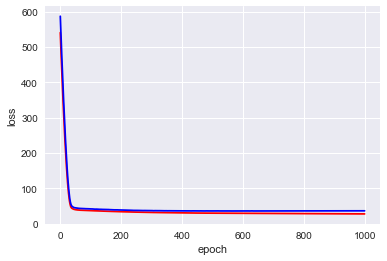

In [13]:
### fit neural net with large number of units and L2 regularization

#make model
lp2pen = .01
nx = Xtr1.shape[1]
nn2 = models.Sequential()
nn2.add(layers.Dense(units=50,activation='sigmoid',kernel_regularizer = regularizers.l2(lp2pen),input_shape=(nx,)))
nn2.add(layers.Dense(units=1))

#compile model
nn2.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

# fit
nhist = nn2.fit(Xtr1,ytrain,epochs=1000,verbose=1,batch_size=20,validation_data=(Xte1,ytest))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')

### plot fit -in sample
#yhtr = nn2.predict(Xtr1)
#plt.scatter(Xtr1,ytrain,c='red')
#plt.scatter(Xtr1,yhtr,c='blue')
#plt.xlabel('x=lstat'); plt.ylabel('y=medv')

### plot fit -out sample
#yhte = nn2.predict(Xte1)
#plt.scatter(Xte1,ytest,c='red')
#plt.scatter(Xte1,yhte,c='blue')
#plt.xlabel('x=lstat'); plt.ylabel('y=medv')

12/12 [==============================] - 0s 816us/step


Text(0, 0.5, 'y=medv')

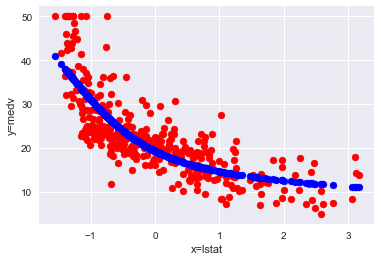

In [14]:
### plot fit -in sample
yhtr = nn2.predict(Xtr1)
plt.scatter(Xtr1,ytrain,c='red')
plt.scatter(Xtr1,yhtr,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')

4/4 [==============================] - 0s 1ms/step


Text(0, 0.5, 'y=medv')

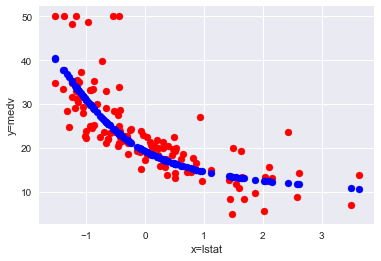

In [15]:
### plot fit -out sample
yhte = nn2.predict(Xte1)
plt.scatter(Xte1,ytest,c='red')
plt.scatter(Xte1,yhte,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')